In [125]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [87]:
features = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")
test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")

In [88]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [89]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [90]:
test_data.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [91]:
train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [92]:
features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [93]:
# Fill in the NaN values with 0s 
features["MarkDown1"] = features["MarkDown1"].fillna(value=0)
features["MarkDown2"] = features["MarkDown2"].fillna(value=0)
features["MarkDown3"] = features["MarkDown3"].fillna(value=0)
features["MarkDown4"] = features["MarkDown4"].fillna(value=0)
features["MarkDown5"] = features["MarkDown5"].fillna(value=0)

In [94]:
features.isna().sum()

Store             0
Date              0
Temperature       0
Fuel_Price        0
MarkDown1         0
MarkDown2         0
MarkDown3         0
MarkDown4         0
MarkDown5         0
CPI             585
Unemployment    585
IsHoliday         0
dtype: int64

In [95]:
# Drop rows with null values
features = features.dropna()

In [96]:
features.isna().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [97]:
stores.isna().sum()

Store    0
Type     0
Size     0
dtype: int64

In [98]:
test_data.isna().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [99]:
train_data.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [100]:
# Merge train_data with features and stores dataframe, both of these dataframes will have good data for predicting sales
train_merged = pd.merge(train_data, features, on=["Store", "Date"])
train_merged = pd.merge(train_merged, stores, on=["Store"])
train_merged.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315


In [101]:
test_merged = pd.merge(test_data, features, on=["Store", "Date"])
test_merged = pd.merge(test_merged, stores, on=["Store"])
test_merged.head()

,Store,Dept,Date,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315


In [102]:
# Drop duplicate holiday column, and rename IsHoliday_x to Holiday
train_merged = train_merged.drop("IsHoliday_y", axis=1)
train_merged = train_merged.rename(columns={"IsHoliday_x":"Holiday"})
train_merged.head()

,Store,Dept,Date,Weekly_Sales,Holiday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315


In [103]:
test_merged = test_merged.drop("IsHoliday_y", axis=1)
test_merged = test_merged.rename(columns={"IsHoliday_x":"Holiday"})
test_merged.head()

,Store,Dept,Date,Holiday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315


In [104]:
(train_merged["Weekly_Sales"] < 0).sum()

1285

In [105]:
train_merged[train_merged["Weekly_Sales"] < 0].head()

,Store,Dept,Date,Weekly_Sales,Holiday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
188,1,47,2010-02-19,-863.0,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
406,1,47,2010-03-12,-698.0,False,57.79,2.667,0.0,0.0,0.0,0.0,0.0,211.380643,8.106,A,151315
2549,1,47,2010-10-08,-58.0,False,63.93,2.633,0.0,0.0,0.0,0.0,0.0,211.746754,7.838,A,151315
3632,1,54,2011-01-21,-50.0,False,44.04,3.016,0.0,0.0,0.0,0.0,0.0,211.827234,7.742,A,151315
4419,1,47,2011-04-08,-298.0,False,67.84,3.622,0.0,0.0,0.0,0.0,0.0,215.074394,7.682,A,151315


In [106]:
train_merged.shape

(421570, 16)

Remove rows that contain outliers

In [107]:
train_merged = train_merged[train_merged["Weekly_Sales"] > 0]
train_merged.shape

(420212, 16)

In [108]:
train_merged[train_merged["MarkDown1"] < 0].shape

(0, 16)

In [109]:
train_merged[train_merged["MarkDown2"] < 0].shape
train_merged = train_merged[(train_merged["MarkDown2"] >= 0) & (train_merged["MarkDown3"] >= 0) & (train_merged["MarkDown4"] >= 0) & (train_merged["MarkDown5"] >= 0)]

In [110]:
train_merged.shape

(418654, 16)

In [111]:
test_merged = test_merged[(test_merged["MarkDown1"] >= 0) & (test_merged["MarkDown2"] >= 0) & (test_merged["MarkDown3"] >= 0)
& (test_merged["MarkDown4"] >= 0) & (test_merged["MarkDown5"] >= 0)]
test_merged.shape

(75623, 15)

In [112]:
train_merged.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000,418654.000000
mean,22.197354,44.242241,16028.664965,60.052348,3.359308,2575.945153,882.156489,470.476283,1080.156246,1654.468456,171.202468,7.961483,136684.968430
std,12.790526,30.510172,22726.308043,18.454874,0.458387,6056.919377,5086.078731,5544.292474,3901.826427,4207.467593,39.158998,1.864320,61010.768249
min,1.000000,1.000000,0.010000,-2.060000,2.472000,0.000000,0.000000,0.000000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2118.287500,46.660000,2.931000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7659.405000,62.060000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20267.445000,74.250000,3.735000,2753.900000,2.630000,4.360000,415.360000,2146.940000,212.412888,8.567000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [113]:
# Weekly sales has a large standard deviation, we'll normalize this column
norm_testing = train_merged.copy()
norm_testing["Weekly_Sales"] = np.log10(norm_testing["Weekly_Sales"])
norm_testing.head()

,Store,Dept,Date,Weekly_Sales,Holiday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,4.396626,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,2,2010-02-05,4.704196,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
2,1,3,2010-02-05,4.137991,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
3,1,4,2010-02-05,4.601561,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
4,1,5,2010-02-05,4.508252,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315


In [118]:
# Convert the datatype for the Date column to Datetime
norm_testing["Date"] = pd.to_datetime(norm_testing["Date"])
norm_testing.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday                   bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
dtype: object

In [122]:
# Create 2 new columns, Year and Month 
norm_testing["Year"] = norm_testing["Date"].dt.year
norm_testing["Month"] = norm_testing["Date"].dt.month
norm_testing.head()

,Store,Dept,Date,Weekly_Sales,Holiday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month
0,1,1,2010-02-05,4.396626,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2
1,1,2,2010-02-05,4.704196,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2
2,1,3,2010-02-05,4.137991,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2
3,1,4,2010-02-05,4.601561,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2
4,1,5,2010-02-05,4.508252,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2


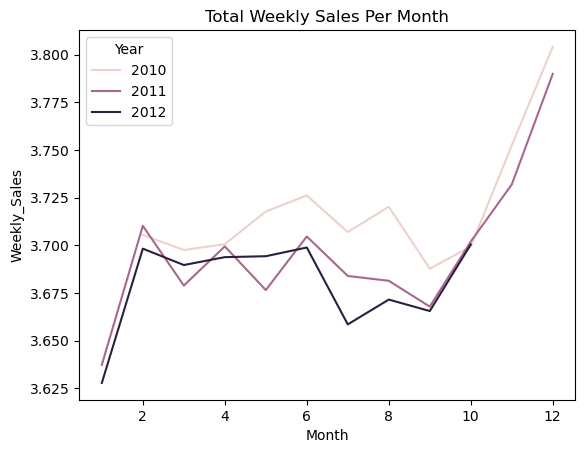

In [136]:
sns.lineplot(data=norm_testing, x="Month", y="Weekly_Sales", hue="Year", errorbar=None)
plt.title("Total Weekly Sales Per Month")
plt.show()

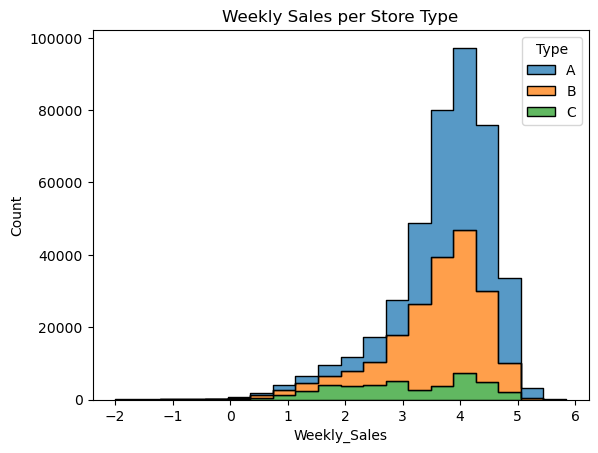

In [137]:
sns.histplot(data=norm_testing, x="Weekly_Sales", hue="Type", bins=20, multiple="stack", element="step")
plt.title("Weekly Sales per Store Type")
plt.show()

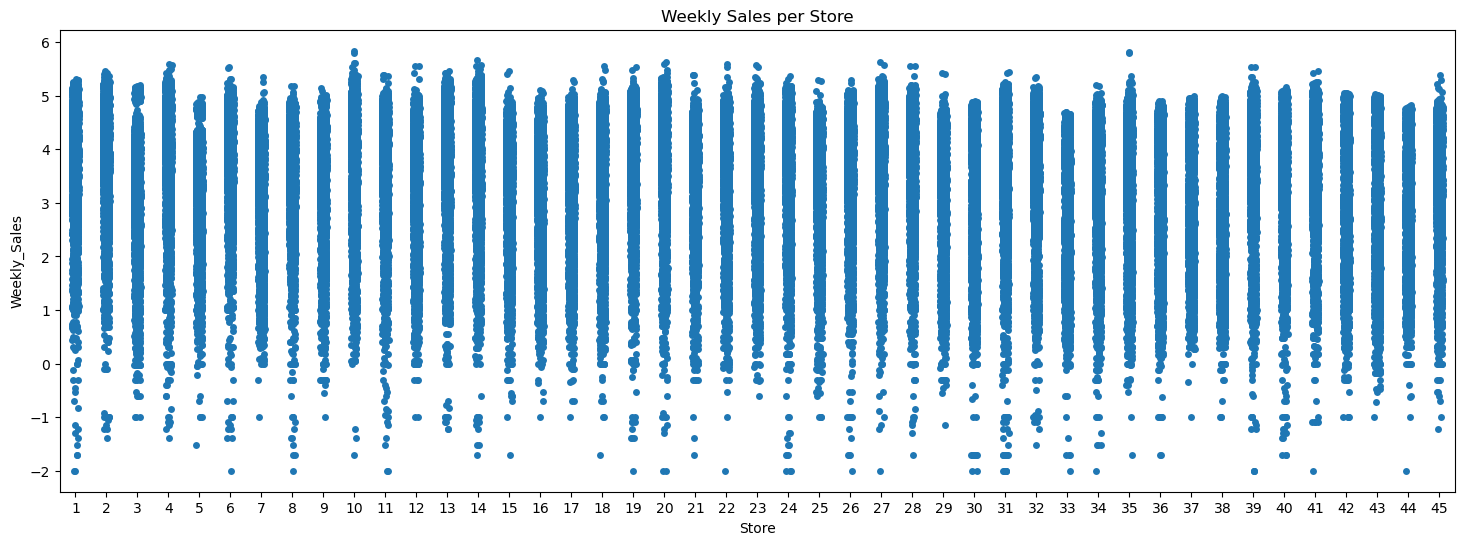

In [141]:
plt.figure(figsize=(18,6))
sns.stripplot(data=norm_testing, x="Store", y="Weekly_Sales")
plt.title("Weekly Sales per Store")
plt.show()

In [145]:
grouped_df = norm_testing.groupby(["Store", "Dept"])["Weekly_Sales"].mean().to_frame().reset_index()

In [146]:
grouped_df.head()

,Store,Dept,Weekly_Sales
0,1,1,4.322719
1,1,2,4.662593
2,1,3,4.064769
3,1,4,4.566499
4,1,5,4.354620


In [147]:
idx = grouped_df.groupby("Store")["Weekly_Sales"].idxmax()

In [149]:
df_best_dept = grouped_df.loc[idx]
df_best_dept.head()

,Store,Dept,Weekly_Sales
69,1,92,5.128708
147,2,92,5.214278
190,3,38,5.029509
297,4,92,5.199258
340,5,38,4.737167


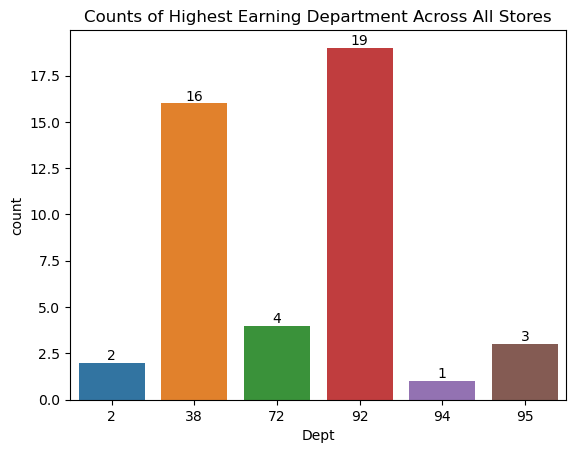

In [154]:
ax = sns.countplot(df_best_dept, x="Dept")
for label in ax.containers:
    ax.bar_label(label)
plt.title("Counts of Highest Earning Department Across All Stores")
plt.show()

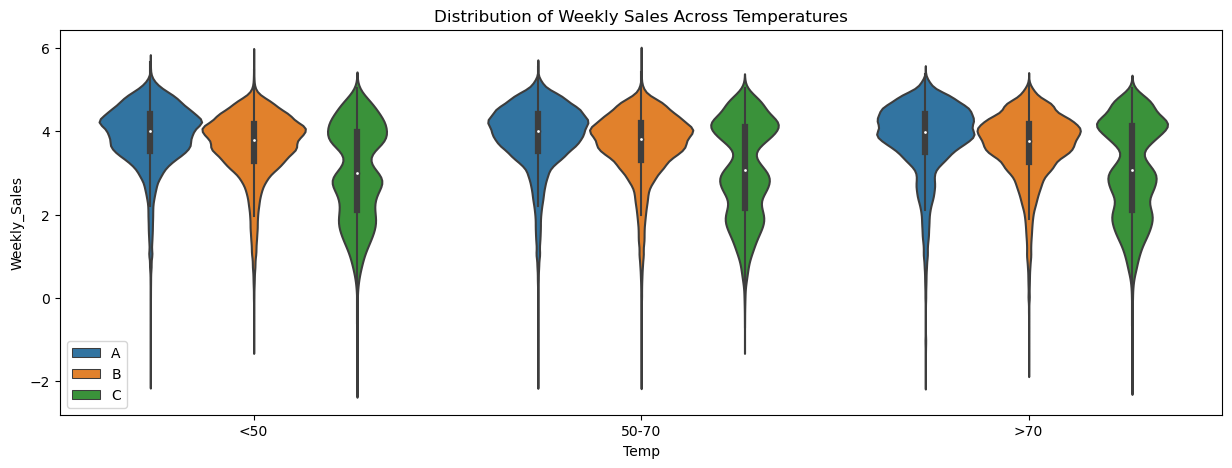

In [158]:
norm_testing["Temp"] = pd.cut(norm_testing["Temperature"], [-10, 50, 70, 110], labels=["<50", "50-70", ">70"])
plt.figure(figsize=(15,5))
sns.violinplot(data=norm_testing, x="Temp", y="Weekly_Sales", hue="Type")
plt.legend(loc="lower left")
plt.title("Distribution of Weekly Sales Across Temperatures")
plt.show()

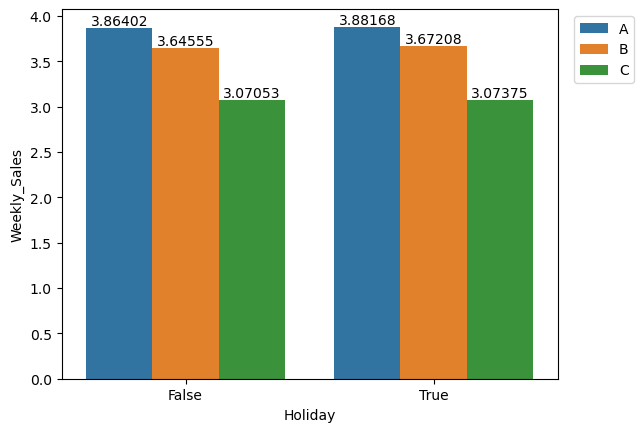

In [165]:
norm_group = norm_testing.groupby(["Holiday", "Type"])["Weekly_Sales"].mean().to_frame().reset_index()

ax = sns.barplot(data=norm_group, x="Holiday", y="Weekly_Sales", hue="Type")
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

In [178]:
cpi_group = norm_testing.groupby("Date")["CPI"].mean().reset_index()
unemployment_group = norm_testing.groupby("Date")["Unemployment"].mean().reset_index()
fuel_group = norm_testing.groupby("Date")["Fuel_Price"].mean().reset_index()
sales_group = norm_testing.groupby("Date")["Weekly_Sales"].mean().reset_index()

In [180]:
eco_df = pd.DataFrame()
eco_df["avg_cpi"] = cpi_group["CPI"]
eco_df["avg_unemployment"] = unemployment_group["Unemployment"]
eco_df["avg_fuel"] = fuel_group["Fuel_Price"]
eco_df["avg_sales"] = sales_group["Weekly_Sales"]

In [181]:
eco_df.head()

,avg_cpi,avg_unemployment,avg_fuel,avg_sales
0,167.328549,8.578592,2.717968,3.706898
1,167.401961,8.567855,2.695955,3.729922
2,167.386208,8.574593,2.673506,3.715260
3,167.708233,8.562094,2.685486,3.669259
4,167.680036,8.573890,2.731923,3.694994


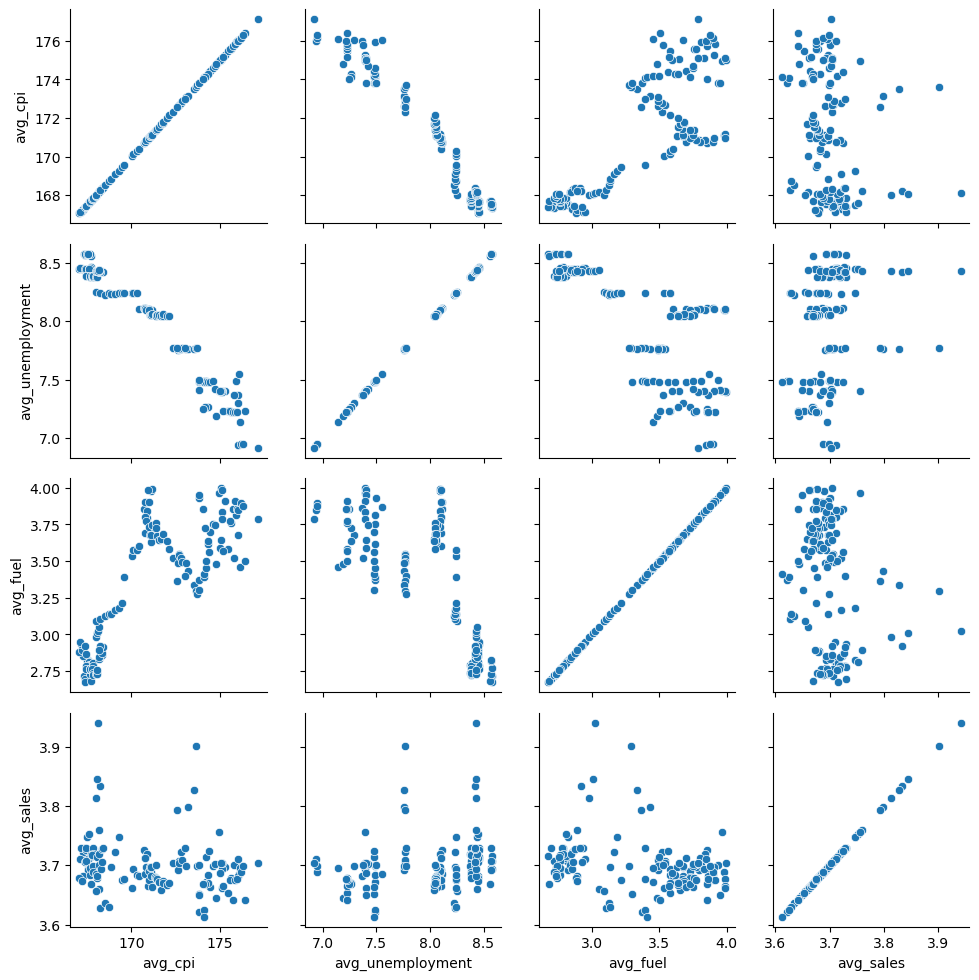

In [184]:
g = sns.PairGrid(eco_df)
g.map(sns.scatterplot)
plt.show()

In [191]:
norm_group = norm_testing.groupby("Date")[["Weekly_Sales", "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]].mean().reset_index()

In [192]:
norm_group.set_index("Date", inplace=True)

In [193]:
norm_group.head()

,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
Date,,,,,,
2010-02-05,3.706898,0.0,0.0,0.0,0.0,0.0
2010-02-12,3.729922,0.0,0.0,0.0,0.0,0.0
2010-02-19,3.715260,0.0,0.0,0.0,0.0,0.0
2010-02-26,3.669259,0.0,0.0,0.0,0.0,0.0
2010-03-05,3.694994,0.0,0.0,0.0,0.0,0.0


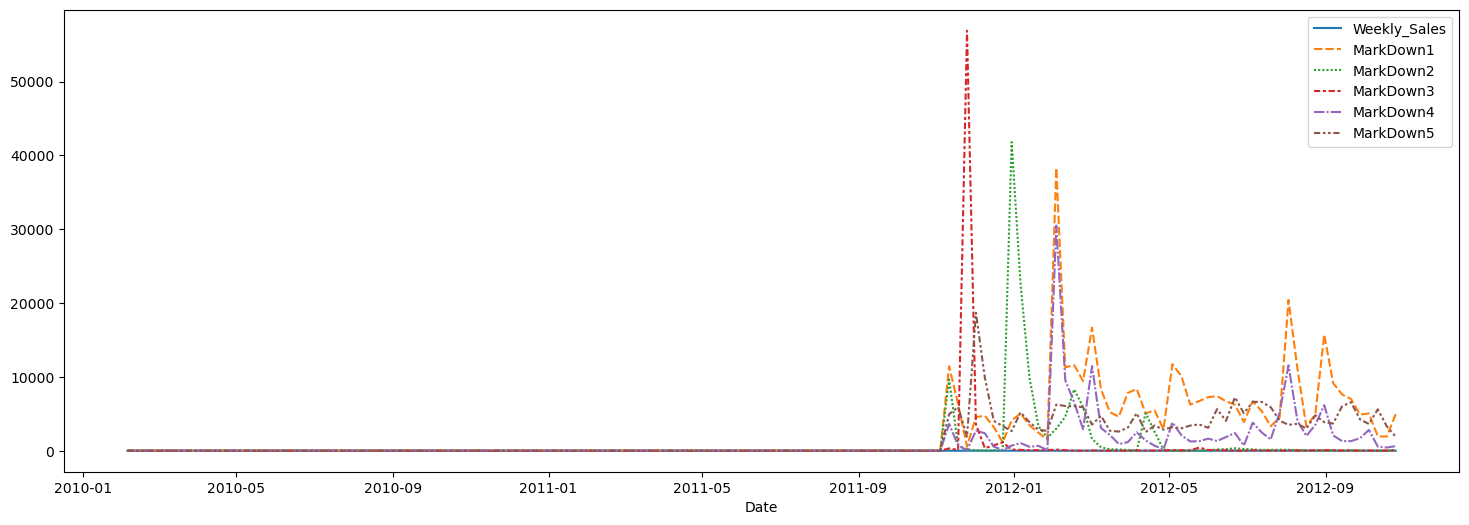

In [197]:
plt.figure(figsize=(18,6))
sns.lineplot(data=norm_group)
plt.show()

These visualizations show us that there does not seem to be a strong correlation between weekly sales and economic factors (Unemployment, Gas Prices, and CPI), markdowns, and temperature. We did see however, that weekly sales followed a seasonal trend for months and holidays. We also saw that slaes performance varies by strore and department. 

In [221]:
training_df = pd.DataFrame()
training_df = train_merged[["Weekly_Sales", "Store", "Dept", "Holiday", "Type", "Date"]].reset_index(drop=True)
final_train_df = training_df.copy()

testing_df = pd.DataFrame()
testing_df = test_merged[["Store", "Dept", "Holiday", "Type", "Date"]].reset_index(drop=True)
final_test_df = testing_df.copy()

In [205]:
training_df.head()

,Weekly_Sales,Store,Dept,Holiday,Type,Date
0,24924.50,1,1,False,A,2010-02-05
1,50605.27,1,2,False,A,2010-02-05
2,13740.12,1,3,False,A,2010-02-05
3,39954.04,1,4,False,A,2010-02-05
4,32229.38,1,5,False,A,2010-02-05


In [206]:
testing_df.head()

,Store,Dept,Holiday,Type,Date
0,1,1,False,A,2012-11-02
1,1,2,False,A,2012-11-02
2,1,3,False,A,2012-11-02
3,1,4,False,A,2012-11-02
4,1,5,False,A,2012-11-02


In [208]:
label_encoder = LabelEncoder()
testing_df["Holiday"] = label_encoder.fit_transform(testing_df["Holiday"])
testing_df["Type"] = label_encoder.fit_transform(testing_df["Type"])
testing_df.head()

,Store,Dept,Holiday,Type,Date
0,1,1,0,0,2012-11-02
1,1,2,0,0,2012-11-02
2,1,3,0,0,2012-11-02
3,1,4,0,0,2012-11-02
4,1,5,0,0,2012-11-02


In [209]:
training_df["Holiday"] = label_encoder.fit_transform(training_df["Holiday"])
training_df["Type"] = label_encoder.fit_transform(training_df["Type"])
training_df.head()

,Weekly_Sales,Store,Dept,Holiday,Type,Date
0,24924.50,1,1,0,0,2010-02-05
1,50605.27,1,2,0,0,2010-02-05
2,13740.12,1,3,0,0,2010-02-05
3,39954.04,1,4,0,0,2010-02-05
4,32229.38,1,5,0,0,2010-02-05


In [210]:
training_df.dtypes

Weekly_Sales    float64
Store             int64
Dept              int64
Holiday           int64
Type              int64
Date             object
dtype: object

In [214]:
training_df["Date"] = pd.to_datetime(training_df["Date"])
training_df["Month"] = training_df["Date"].dt.month
training_df["Weekly_Sales_Log"] = np.log10(training_df["Weekly_Sales"])
training_df.drop(["Date", "Weekly_Sales"], axis=1, inplace=True)
training_df.head()

,Store,Dept,Holiday,Type,Month,Weekly_Sales_Log
0,1,1,0,0,2,4.396626
1,1,2,0,0,2,4.704196
2,1,3,0,0,2,4.137991
3,1,4,0,0,2,4.601561
4,1,5,0,0,2,4.508252


In [215]:
testing_df["Date"] = pd.to_datetime(testing_df["Date"])
testing_df["Month"] = testing_df["Date"].dt.month
testing_df.drop(["Date"], axis=1, inplace=True)
testing_df.head()

,Store,Dept,Holiday,Type,Month
0,1,1,0,0,11
1,1,2,0,0,11
2,1,3,0,0,11
3,1,4,0,0,11
4,1,5,0,0,11


In [216]:
train_y = training_df["Weekly_Sales_Log"].to_numpy()
train_x = training_df[["Store", "Dept", "Holiday", "Type", "Month"]].to_numpy()
test_x = testing_df.to_numpy()

In [217]:
regressor = RandomForestRegressor()
regressor.fit(train_x, train_y)

RandomForestRegressor()

In [218]:
predictions = regressor.predict(test_x)

In [222]:
final_test_df["Predictions"] = 10 ** (pd.Series(predictions))
final_test_df

,Store,Dept,Holiday,Type,Date,Predictions
0,1,1,False,A,2012-11-02,23409.658255
1,1,2,False,A,2012-11-02,44345.801212
2,1,3,False,A,2012-11-02,9583.303399
3,1,4,False,A,2012-11-02,37365.090200
4,1,5,False,A,2012-11-02,26882.011485
...,...,...,...,...,...,...
75618,45,93,False,B,2013-04-26,2544.921010
75619,45,94,False,B,2013-04-26,729.361757
75620,45,95,False,B,2013-04-26,51832.756295
75621,45,97,False,B,2013-04-26,6102.377622


In [226]:
final_test_df["Date"] = pd.to_datetime(final_test_df["Date"])
final_train_df["Date"] = pd.to_datetime(final_train_df["Date"])

final_test_df.set_index("Date", inplace=True)
final_train_df.set_index("Date", inplace=True)

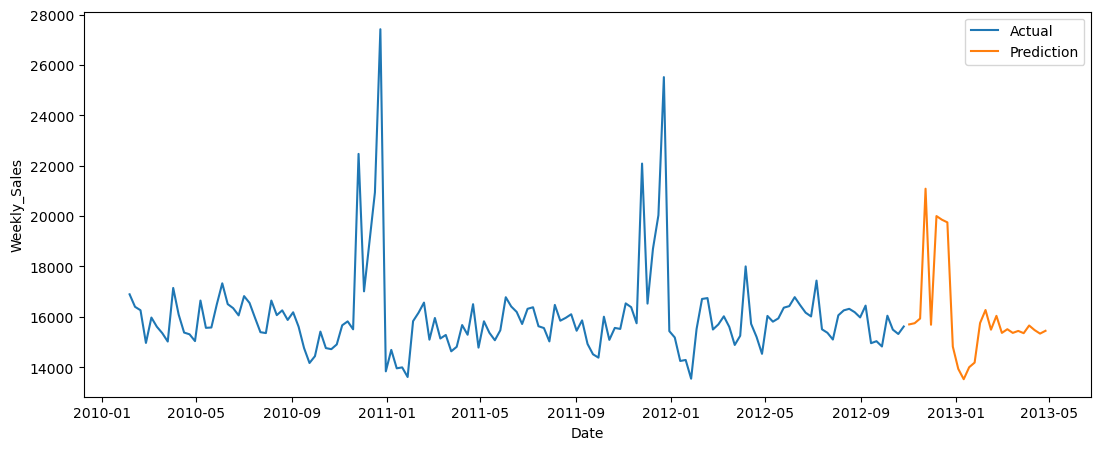

In [227]:
fig, ax = plt.subplots(1,1,figsize=(13,5))
sns.lineplot(final_train_df["Weekly_Sales"], label="Actual", errorbar=None)
sns.lineplot(final_test_df["Predictions"], label="Prediction", errorbar=None)
plt.show()

The predicted value shows an increase during the last 3 months of the year with a fall off point during January of the next year. This prediction is in line with the historical data that shows that sales in increase towards the end of the year. 